In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import hashlib
import cuml
import cudf
%matplotlib inline

In [ ]:
def test_identifier(identifier,test_ratio,hash):
    return hash(np.int64(identifier)).digest()[-1]<256*test_ratio

def split_train_test(data,test_ratio,id,hash = hashlib.md5):
    id_ = data[id]
    split = id_.apply(lambda id1:test_identifier(id1,test_ratio,hash))
    return data[~split],data[split]


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Machine learning/practise models/district_prices_reggression model/housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.iloc[:,9].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [ ]:
data.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

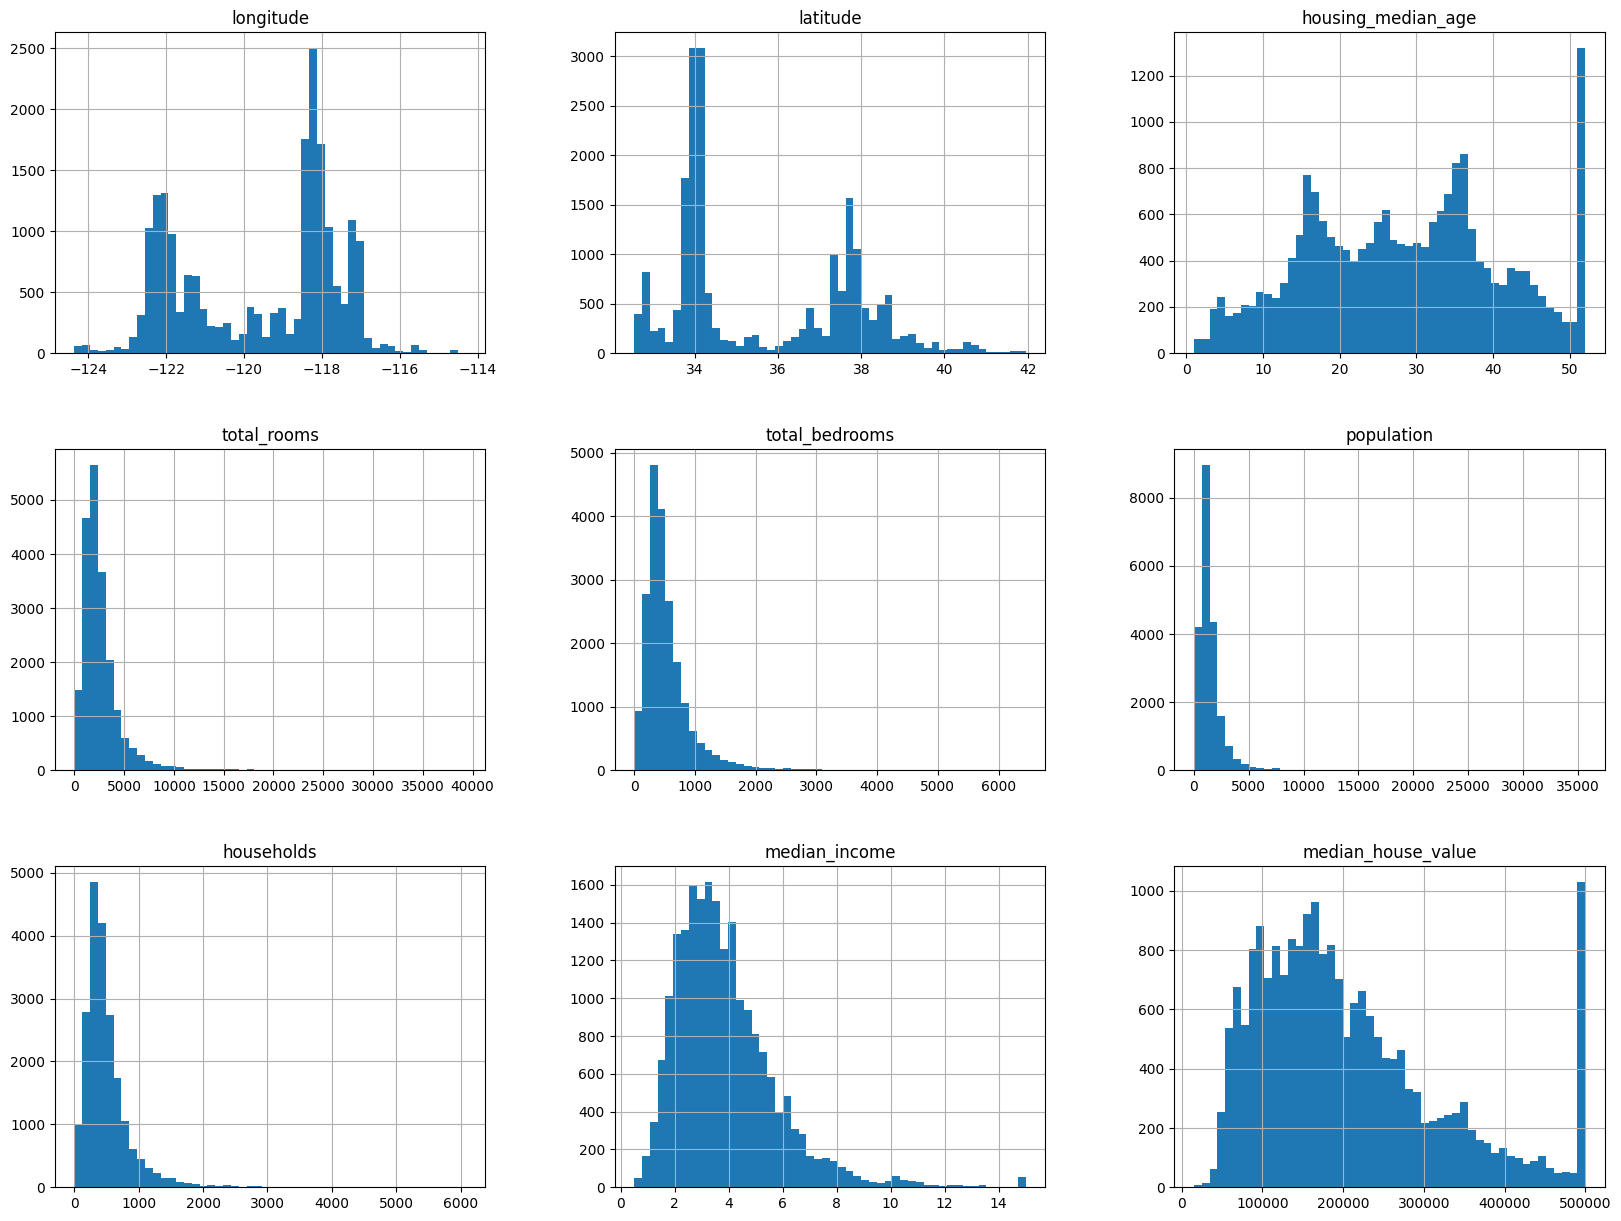

In [ ]:
data.hist(bins = 50,figsize=(20,15))

<Axes: xlabel='longitude', ylabel='latitude'>

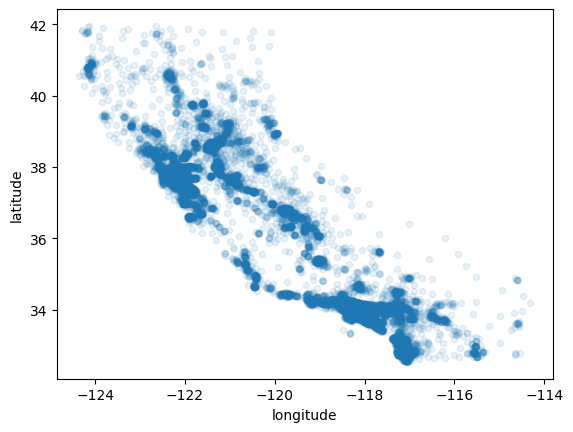

In [ ]:
data.plot(kind = "scatter",x = "longitude",y = "latitude",alpha = 0.1) ## we can get the idea of population spread by seeing this graph

In [ ]:
data["id"] = data["longitude"] * data["latitude"]
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-4630.0724
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-4627.2492
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-4626.7840
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-4627.1625
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-4627.1625


<Axes: xlabel='longitude', ylabel='latitude'>

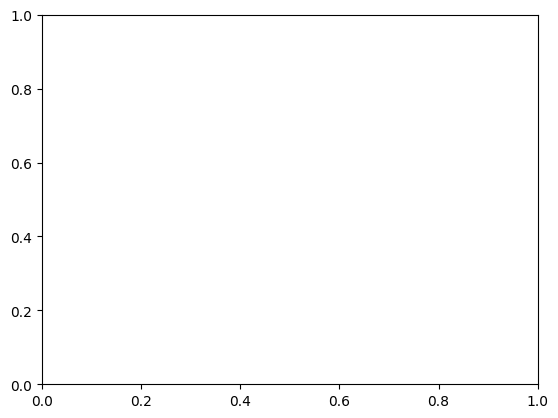

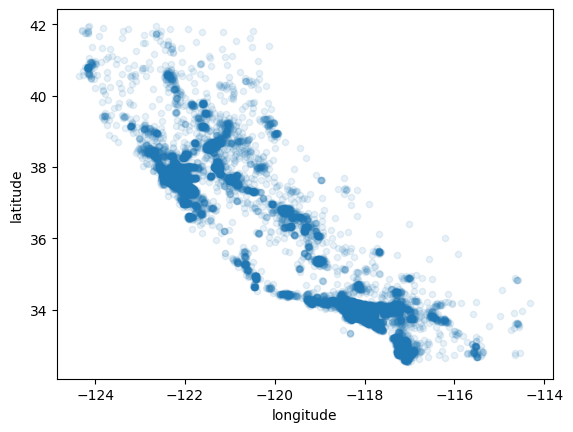

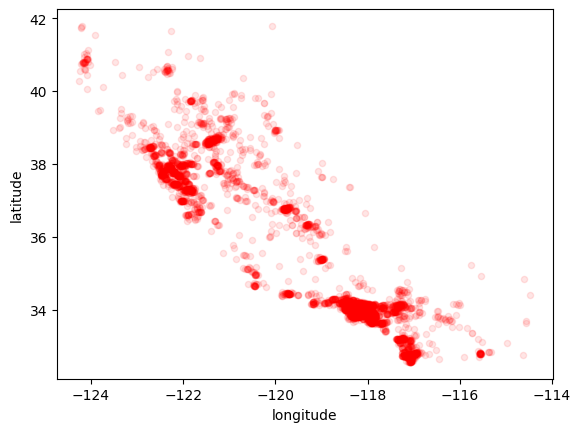

In [ ]:
train_set,test_Set = split_train_test(data,0.2,"id")
plt.subplot(1,1,1)
train_set.plot(kind = "scatter",x = "longitude",y = "latitude",alpha = 0.1)
test_Set.plot(kind = "scatter",x = "longitude",y = "latitude",alpha = 0.1,color = "red")

/tmp/ipython-input-3381091259.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["income_cat"].where(data["income_cat"]<5,5.0,inplace = True)


<Axes: >

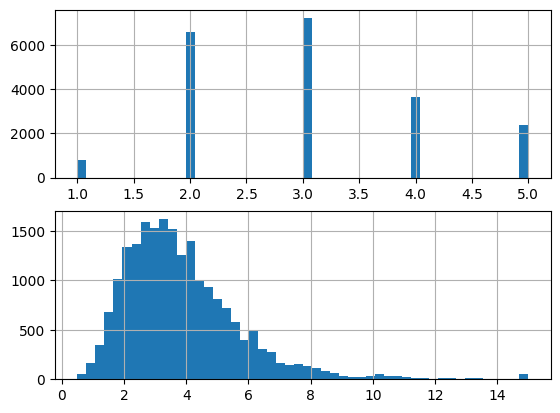

In [ ]:
data["income_cat"] = np.ceil(data["median_income"]/1.5)
#for i in range(len(data["income_cat"])):
#  if data["income_cat"][i] > 5:
#   data["income_cat"][i] = 5
data["income_cat"].where(data["income_cat"]<5,5.0,inplace = True)
plt.subplot(2,1,1)
data["income_cat"].hist(bins = 50)
plt.subplot(2,1,2)
data["median_income"].hist(bins = 50)



In [ ]:
## STRATIFIED SPLITTING
split = sk.model_selection.StratifiedShuffleSplit(n_splits=1,test_size= 0.2,random_state=42)
S = split.split(data,data["income_cat"])
for train_index,test_index in S:
  strat_train_set = data.loc[train_index]
  strat_test_set = data.loc[test_index]
print(strat_train_set["income_cat"].value_counts()/len(strat_train_set))
print(strat_test_set["income_cat"].value_counts()/len(strat_test_set))
print(data["income_cat"].value_counts()/len(data))


income_cat
3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114462
1.0    0.039789
Name: count, dtype: float64
income_cat
3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: count, dtype: float64
income_cat
3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: count, dtype: float64


In [ ]:
## dropping income_cat as splitting has done
data = data.drop("income_cat",axis = 1)
strat_train_set = strat_train_set.drop("income_cat",axis = 1)
strat_test_set = strat_test_set.drop("income_cat",axis = 1)

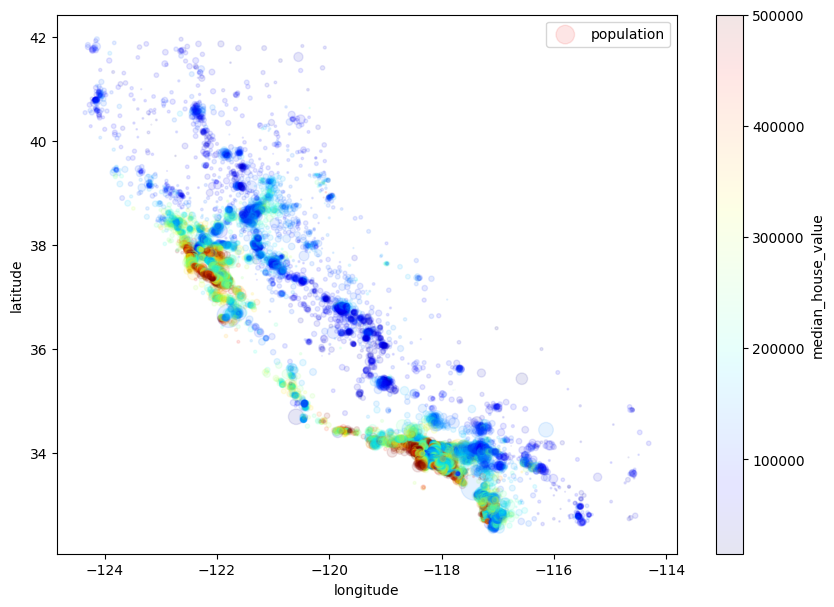

In [ ]:
data.plot(kind = "scatter",x = "longitude",y = "latitude",alpha = 0.1 ,s = data['population']/100,label = "population",figsize = (10,7),c = "median_house_value",cmap = plt.get_cmap("jet"),colorbar = True)
plt.legend()

In [ ]:
corr_matrix = data.drop("ocean_proximity", axis=1).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
id,0.104524
households,0.065843
total_bedrooms,0.049686
population,-0.024650
longitude,-0.045967
latitude,-0.144160


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

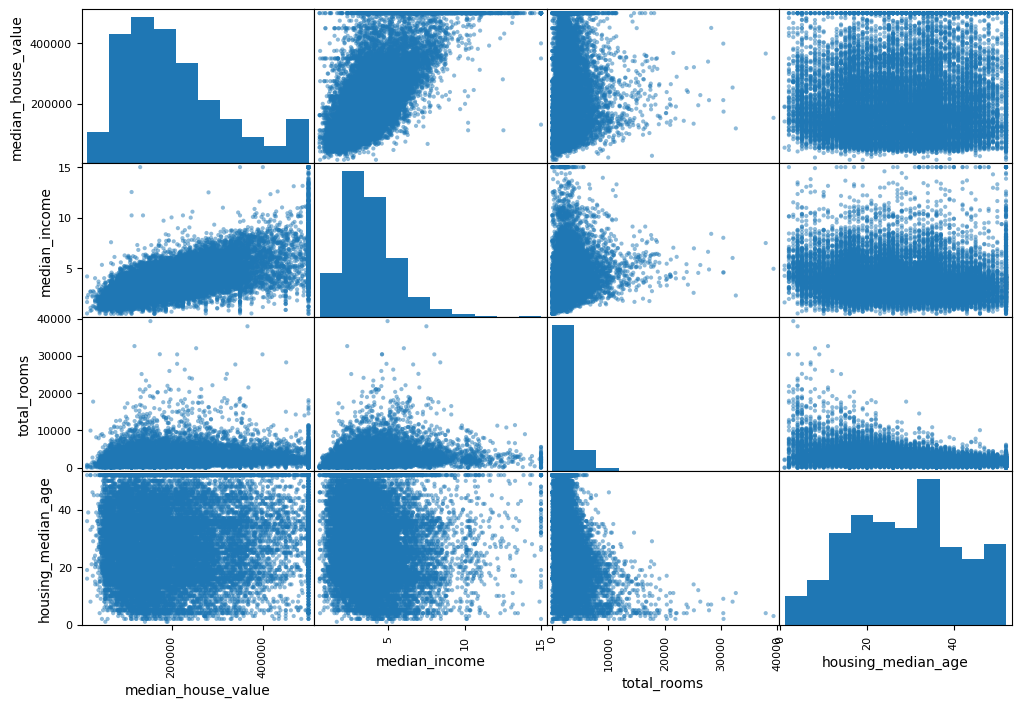

In [ ]:
pd.plotting.scatter_matrix(data[["median_house_value", "median_income", "total_rooms","housing_median_age"]],figsize = (12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

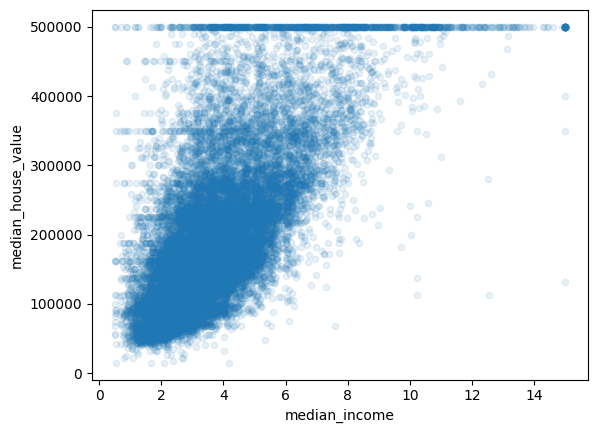

In [ ]:
data.plot(kind = "scatter",x= "median_income",y = "median_house_value",alpha = 0.1)


In [ ]:
data_train = strat_train_set.drop("median_house_value",axis = 1)
data_train_label = strat_train_set["median_house_value"].copy()

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
 9   id                  16512 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [ ]:
#data cleaning
imputer = sk.impute.SimpleImputer(strategy = "mean")
data_num = data_train.drop("ocean_proximity",axis = 1)


In [ ]:
imputer.fit(data_num)
array = imputer.transform(data_num)
data_num = pd.DataFrame(array,columns=data_num.columns)

In [ ]:

data_num["ocean_proximity"] = data_train["ocean_proximity"]
data_train = data_num
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   id                  16512 non-null  float64
 9   ocean_proximity     13181 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [ ]:
data["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [ ]:
cat_encoder = sk.preprocessing.OneHotEncoder()
data_train_ocean_encoded,data_ocean_category = data_train["ocean_proximity"].factorize()
data_ocean_encode = cat_encoder.fit_transform(data_train_ocean_encoded.reshape(-1,1))
data_ocean_encode.toarray()

array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [ ]:
data_train_scaled1 = sk.preprocessing.minmax_scale(data_train.drop("ocean_proximity",axis = 1))
data_train_scaled1 = pd.DataFrame(data_train_scaled1,columns = data_train.drop("ocean_proximity",axis = 1).columns)
data_train_scaled1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,id
0,0.287849,0.635494,0.549020,0.098362,0.128061,0.062614,0.131441,0.115426,0.362656
1,0.709163,0.058448,0.117647,0.135168,0.137403,0.056392,0.143017,0.402574,0.913723
2,0.528884,0.300744,0.843137,0.041003,0.049613,0.018610,0.055639,0.163798,0.685366
3,0.719124,0.022317,0.450980,0.047591,0.083280,0.025085,0.089806,0.119067,0.943453
4,0.562749,0.184910,0.509804,0.089790,0.103737,0.051403,0.107916,0.275617,0.782835


In [ ]:
data_train_scaled2 = sk.preprocessing.StandardScaler().fit_transform(data_train.drop("ocean_proximity",axis = 1))
data_train_scaled2 = pd.DataFrame(data_train_scaled2,columns = data_train.drop("ocean_proximity",axis = 1).columns)
data_train_scaled2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,id
0,-0.941350,1.347438,0.027564,0.584777,0.638183,0.732602,0.556286,-0.893647,-1.274699
1,1.171782,-1.192440,-1.722018,1.261467,0.779415,0.533612,0.721318,1.292168,1.192371
2,0.267581,-0.125972,1.220460,-0.469773,-0.547672,-0.674675,-0.524407,-0.525434,0.170042
3,1.221738,-1.351474,-0.370069,-0.348652,-0.038752,-0.467617,-0.037297,-0.865929,1.325471
4,0.437431,-0.635818,-0.131489,0.427179,0.270495,0.374060,0.220898,0.325752,0.606398


In [ ]:
print(strat_train_set["housing_median_age"].dtype)

float64


#PREPAPREING DATA TO TRAIN MODEL

##TRANSFORMERS

In [ ]:
## Transformers
from sklearn.base import BaseEstimator,TransformerMixin
room_index = 3
household_index = 4
population_index = 5

class attribute_combiner(BaseEstimator,TransformerMixin):
  def __init__(self,rooms,household,population):
    self.room_index = rooms
    self.household_index = household
    self.population_index = population
  def fit(self,X,Y= None):
    return self
  def transform(self,X,Y= None):
    rooms_per_household = X[:,self.room_index]/X[:,self.household_index]
    population_per_household = X[:,self.population_index]/X[:,self.household_index]
    X = np.c_[X,rooms_per_household,population_per_household]
    return X
class divide_dataframe(BaseEstimator,TransformerMixin):
  def __init__(self):
    self.l1 = []
    self.l2 = []
  def fit(self,pd,y = None):
    for i in pd.columns:
      if(pd[i].dtype == "object"):
        self.l1.append(i)
      else:
        self.l2.append(i)
    return self
  def transform(self,pd,y = None):
    return self.l2,self.l1

class Dataframe(BaseEstimator,TransformerMixin):
  def __init__(self,attribute):
    self.attribute = attribute
  def fit(self,x,y = None):
    return self
  def transform(self,x,y = None):
    return x[self.attribute]


## faltu transformer below
class data_cleaner(BaseEstimator,TransformerMixin):
  def __init__(self):
    return None
  def fit(self,x,y = None):
    return self
  def transform(self,x,y = None):
    imputer = sk.impute.SimpleImputer(strategy = "median")
    array = imputer.fit_transform(x)
    return pd.DataFrame(array,columns = x.columns)




## PIPELINE

In [ ]:
sep = divide_dataframe()
num,cat = sep.fit_transform(data_train)

In [ ]:
## PIPELINES
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([
    ("data_frame",Dataframe(num)),
    ("impute",sk.impute.SimpleImputer(strategy = "median")),
    ("attribute_combine",attribute_combiner(3,6,5)),
    ("scale",sk.preprocessing.StandardScaler())
    ])
cat_pipeline = Pipeline([
    ("data_frame",Dataframe(cat)),
    ("encode",sk.preprocessing.OneHotEncoder())
])

In [ ]:
from sklearn.pipeline import FeatureUnion
full_pipeline = FeatureUnion([
    ("num_pipeline",num_pipeline),
    ("cat_pipeline",cat_pipeline)
])
data_train_prepared = full_pipeline.fit_transform(strat_train_set)

#TRAINING MODEL

##linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model1 = LinearRegression()
linear_model1.fit(data_train_prepared,data_train_label)

LinearRegression()

In [ ]:
## testing model on the basis of strat_Test_set
data_test_prepared = full_pipeline.transform(strat_test_set)
data_test_label = strat_test_set["median_house_value"].copy()
predicted_label = linear_model1.predict(data_test_prepared)
print(predicted_label)
print("-"*100)
print(data_test_label.values)

[421342.96053527 299661.8213339  249454.37941162 ... 314501.42316462
 265699.99859398 245745.40977123]
----------------------------------------------------------------------------------------------------
[500001. 162500. 204600. ... 293800. 335700. 215600.]


In [ ]:
## testing model on the basis of sample from strat_train_set
sample_test = strat_train_set.iloc[:10,:]
sample_test_label = sample_test["median_house_value"].copy()
sample_test_prepared = full_pipeline.transform(sample_test)
sample_predicted_label = linear_model1.predict(sample_test_prepared)
print(sample_predicted_label)
print("-"*100)
print(sample_test_label.values)

[ 87361.04524316 303431.77808252 158002.35482911 178237.9084496
 251264.70155657 210845.641277   373852.45502933 274347.18109345
 156933.22799991  11442.60337276]
----------------------------------------------------------------------------------------------------
[ 72100. 279600.  82700. 112500. 238300. 165700. 412300. 349600. 181300.
 500001.]


In [ ]:
## measurinf rmse
from sklearn.metrics import mean_squared_error
data_train_predict1 = linear_model1.predict(data_train_prepared)
mse = mean_squared_error(data_train_label,data_train_predict1)
rmse = np.sqrt(mse)
print(rmse)
## underfit

68594.3334614956


##Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(data_train_prepared,data_train_label)


DecisionTreeRegressor()

In [ ]:
data_train_predict2 = model2.predict(data_train_prepared)
mse2 = mean_squared_error(data_train_label,data_train_predict2)
rmse2 = np.sqrt(mse2)
print(rmse2)

0.0


In [ ]:
data_test_pedict = model2.predict(data_test_prepared)
mse3 = mean_squared_error(data_test_label,data_test_pedict)
rmse3 = np.sqrt(mse3)
print(rmse3)
## overfit

70401.68602730965


## RANDOM FOREST REGRESSOR ( GPU ACCELERATED)

In [ ]:
from cuml.ensemble import RandomForestRegressor
model3 = RandomForestRegressor()
# Convert sparse matrix to numpy array, then to pandas DataFrame, then to cudf DataFrame
data_train_prepared_cudf = cudf.DataFrame.from_pandas(pd.DataFrame(data_train_prepared.toarray()))
# Convert pandas Series to pandas DataFrame, then to cudf DataFrame
data_train_label_cudf = cudf.DataFrame.from_pandas(pd.DataFrame(data_train_label))
model3.fit(data_train_prepared_cudf,data_train_label_cudf)

RandomForestRegressor()

In [ ]:
## rmse on training set
from cuml.metrics import mean_squared_error
data_train_predict3 = model3.predict(data_train_prepared_cudf)
mse4 = mean_squared_error(data_train_label_cudf,data_train_predict3)
rmse4 = np.sqrt(mse4)
print(rmse4)

22916.214352232364


# VALIDATION OF DIFFERENT
 first we validate too many models in training set and select one which performs best on the training and then we use test set in the end to get the error of our confident model.

we use cross validation in training set to validate a model.


In [ ]:
## cross validation on model2( DECISION TREE regressor)
from sklearn.model_selection import cross_val_score
scores2 = cross_val_score(model2,data_train_prepared,data_train_label,scoring = "neg_mean_squared_error",cv = 10)
rmse_scores2 = np.sqrt(-scores2)
print("mean rmse = ",rmse_scores2.mean())
print("standard_deviation",rmse_scores2.std())

mean rmse =  69656.86565305052
standard_deviation 2000.4724028122905


In [ ]:
## cross validation on model1 (linear regressior)
scores1 = cross_val_score(linear_model1,data_train_prepared,data_train_label,scoring = "neg_mean_squared_error",cv = 10)
rmse_scores1 = np.sqrt(-scores1)
print("mean rmse = ",rmse_scores1.mean())
print("standard_deviation",rmse_scores1.std())

mean rmse =  68840.86938016713
standard_deviation 2398.7407186035725


In [ ]:
## cross validation on model3 (random forest cuml)
from sklearn.model_selection import KFold
from cuml.metrics import mean_squared_error
kf = KFold(n_splits = 10,shuffle = True,random_state=42)
errors=[]
for train_index,test_index in kf.split(data_train_prepared_cudf):
  train_data = data_train_prepared_cudf.iloc[train_index]
  train_label = data_train_label_cudf.iloc[train_index]
  test_data = data_train_prepared_cudf.iloc[test_index]
  test_label = data_train_label_cudf.iloc[test_index]
  model3.fit(train_data,train_label)
  predict = model3.predict(test_data)
  mse = mean_squared_error(predict,test_label)
  rmse = np.sqrt(mse)
  errors.append(rmse)
errors = np.array(errors)


In [ ]:
print("mean = ",errors.mean())
print("standard deviation = ",errors.std())

mean =  50167.36972489911
standard deviation =  2055.153704864076


In [ ]:
from joblib import dump,load
dump(model2,"Prototype_decision_tree_model.joblib")
dump(model3,"Prototype_random_forest_model.joblib")
dump(linear_model1,"Prototype_linear_regression_model.joblib")

['Prototype_linear_regression_model.joblib']

#Hyperparameter tuning of Randomforest

In [ ]:
from cuml.ensemble import RandomForestRegressor
from cuml.model_selection import GridSearchCV
final_model_v1 = RandomForestRegressor()
parameter_grid = {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}
grid_search = GridSearchCV(estimator=final_model_v1, param_grid=parameter_grid,cv=5,verbose=0,scoring="neg_mean_squared_error")
grid_search.fit(data_train_prepared_cudf.to_numpy(),data_train_label_cudf.to_numpy().ravel()) ## here we are fititng with flatten numpy arrays
# as scoring is set to "neg_mean_squared_error" which is scikit cpu matrice that can'tread gpu object(ie cudf) but can numpy array and ravel to flattten column array


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [ ]:
cv_Scores = grid_search.cv_results_
l = np.sqrt(-1*cv_Scores["mean_test_score"])
for x,y in zip(l,cv_Scores["params"]):
  print(x,y)

65591.65440998889 {'max_features': 2, 'n_estimators': 3}
59144.2967577172 {'max_features': 2, 'n_estimators': 10}
56735.42522617333 {'max_features': 2, 'n_estimators': 30}
61257.964568691335 {'max_features': 4, 'n_estimators': 3}
54461.65386730299 {'max_features': 4, 'n_estimators': 10}
52188.00238551973 {'max_features': 4, 'n_estimators': 30}
60834.550789851295 {'max_features': 6, 'n_estimators': 3}
53992.00568828843 {'max_features': 6, 'n_estimators': 10}
52177.49394828037 {'max_features': 6, 'n_estimators': 30}
60728.875254557104 {'max_features': 8, 'n_estimators': 3}
53867.17706533222 {'max_features': 8, 'n_estimators': 10}
51990.5250186987 {'max_features': 8, 'n_estimators': 30}


In [ ]:
final_model = grid_search.best_estimator_
final_model
dump(final_model,"Prototype_district_prices_predictor.joblib")

['Prototype_district_prices_predictor.joblib']

In [ ]:
data_predict = final_model.predict(cudf.DataFrame.from_pandas(pd.DataFrame(data_test_prepared.toarray())))
data_test_label_cudf = cudf.DataFrame.from_pandas(pd.DataFrame(data_test_label))
mse = mean_squared_error(data_test_label_cudf, data_predict)
rmse = np.sqrt(mse)
print(rmse)

50216.82896940163
